### Prerequisite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library. 


In [73]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [74]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

In [1]:
!python -m pip install --upgrade scikit-learn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.6/site-packages (0.24.2)
The scikit-learn version is 0.24.2.


In [2]:
# Import SimpleImputer - needed for scikit-learn version 0.24.2
from sklearn.impute import SimpleImputer

# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [3]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [4]:
# Now you can import and use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# your code goes here

In [5]:
# Import PCAs
from sklearn.decomposition import PCA

In [6]:
# delete b4 submission - not working?
# Import LinearRegression for feature_names_in
from sklearn.linear_model import LinearRegression

In [7]:
# Import KMeans
from sklearn.cluster import KMeans

In [8]:
# Similarly, should you need any other package, they can install it as:
!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'

# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [9]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [10]:
# Load in the general demographics data
azdias_demographics = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter = ";")

# Load in the feature summary file
azdias_feature_sum = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter = ";")

In [11]:
# Check the structure of the data after it's loaded (e.g. print the number of rows and columns)
azdias_demographics.shape

(891221, 85)

In [12]:
# List columns
list(azdias_demographics.columns)

['AGER_TYP',
 'ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'GEBURTSJAHR',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'PRAEGENDE_JUGENDJAHRE',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'TITEL_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'ALTER_HH',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'KK_KUNDENTYP',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'GEBAEUDETYP',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'WOHNLAGE',
 'CAME

In [13]:
# Print the first few rows
azdias_demographics.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [14]:
# Info about columns
azdias_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [15]:
# Print the number of rows and columns
azdias_feature_sum.shape

(85, 4)

In [16]:
# Print the first few rows
azdias_feature_sum.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [17]:
# Info about columns
azdias_feature_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [18]:
# Create copies of dataframes to preserve original data
cleaned_azdias_feature_sum = azdias_feature_sum.copy()

In [19]:
# Create function to change missing_or_unknown column data in cleaned_azdias_feature_sum from string object to list
def mis_unk_conversion(missing_or_unknown):

    temp_list=[]
    
    missing_or_unknown = missing_or_unknown[1:-1].split(',')
    
    for item in missing_or_unknown:
        try:
            temp_list.append(int(item))
        except:
            temp_list.append(item)
    return(temp_list)

In [20]:
# Apply function to change data from string object to list in new column
cleaned_azdias_feature_sum['NaN_values'] = cleaned_azdias_feature_sum['missing_or_unknown'].apply(mis_unk_conversion)

# https://www.geeksforgeeks.org/python-pandas-apply/

In [21]:
# Check string object to list conversion
cleaned_azdias_feature_sum.head()

,attribute,information_level,type,missing_or_unknown,NaN_values
0,AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0],[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1],[-1]


In [22]:
# Convert cleaned_feature_sum attribute column to index
cleaned_azdias_feature_sum.set_index('attribute', inplace=True)

# https://saturncloud.io/blog/how-to-set-the-first-column-and-row-as-index-in-pandas/#:~:text=Index%20in%20Pandas-,To%20set%20the%20first%20column%20and%20row%20as%20index%20in,of%20the%20read_csv()%20function.

In [23]:
# Check index conversion
cleaned_azdias_feature_sum.head()

,information_level,type,missing_or_unknown,NaN_values
attribute,,,,
AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
CJT_GESAMTTYP,person,categorical,[0],[0]
FINANZ_MINIMALIST,person,ordinal,[-1],[-1]


In [24]:
# Info about columns
cleaned_azdias_feature_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, AGER_TYP to RELAT_AB
Data columns (total 4 columns):
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
NaN_values            85 non-null object
dtypes: object(4)
memory usage: 3.3+ KB


In [25]:
# Check original values in azdias_demographics AGER_TYP row
for index, row in azdias_demographics.iloc[:10].iterrows():
    print(row['AGER_TYP'])
    
# https://www.freecodecamp.org/news/how-to-iterate-over-rows-with-pandas-loop-through-a-dataframe/
# https://stackoverflow.com/questions/53872905/iterate-over-first-n-rows-in-pandas

-1
-1
-1
2
-1
3
-1
-1
-1
-1


In [26]:
# Search azdias_demographics for instances of missing/unknown values and replace with NaN 
for column in azdias_demographics.columns:
    azdias_demographics[column].replace(cleaned_azdias_feature_sum.loc[column].loc['NaN_values'], np.NaN, inplace = True)
    
# https://knowledge.udacity.com/questions/334122

In [27]:
# Verify [-1, 0] values above replaced with NaN
for index, row in azdias_demographics.iloc[:10].iterrows():
    print(row['AGER_TYP'])

nan
nan
nan
2.0
nan
3.0
nan
nan
nan
nan


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

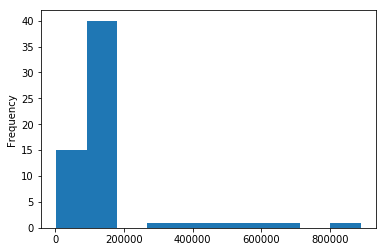

In [28]:
#Plot NaN totals in histogram
azdias_demographics.isna().sum()[azdias_demographics.isna().sum() > 0].plot(kind='hist')

# https://stackoverflow.com/questions/69537383/how-to-plot-count-of-null-values-for-each-column-in-pandas-dataframe

In [29]:
# Investigate patterns in the amount of missing data in each column.

In [30]:
# Find the total of NaNs in each column by creating subset of dataframe
NaN_totals = azdias_demographics.isna().sum()

# Sort columns by NaN total (decending order)
list_of_NaNs_with_column_names = NaN_totals.sort_values(ascending=[False])
print(list_of_NaNs_with_column_names)

# https://saturncloud.io/blog/how-to-count-nan-values-in-a-pandas-dataframe-column/#:~:text=The%20isna()%20function%20returns,sum()%20print(salary_nan_count)
# https://www.w3schools.com/python/pandas/ref_df_sort_values.asp
# https://stackoverflow.com/questions/24988873/python-sort-descending-dataframe-with-pandas

TITEL_KZ                 889061
AGER_TYP                 685843
KK_KUNDENTYP             584612
KBA05_BAUMAX             476524
GEBURTSJAHR              392318
ALTER_HH                 310267
REGIOTYP                 158064
KKK                      158064
W_KEIT_KIND_HH           147988
KBA05_ANTG4              133324
KBA05_GBZ                133324
MOBI_REGIO               133324
KBA05_ANTG1              133324
KBA05_ANTG2              133324
KBA05_ANTG3              133324
PLZ8_GBZ                 116515
PLZ8_HHZ                 116515
PLZ8_BAUMAX              116515
PLZ8_ANTG4               116515
PLZ8_ANTG1               116515
PLZ8_ANTG3               116515
PLZ8_ANTG2               116515
SHOPPER_TYP              111196
VERS_TYP                 111196
HEALTH_TYP               111196
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
KBA13_ANZAHL_PKW         105800
ANZ_HAUSHALTE_AKTIV       99611
CAMEO_INTL_2015           99352
CAMEO_DEU_2015            99352
CAMEO_DE

In [31]:
# Remove the outlier columns from the dataset. (You'll perform other data engineering tasks such as re-encoding and 
# imputation later.)

# Drop all columns where NaN total is > 300,000
azdias_demographics.drop(columns = ['AGER_TYP', 'TITEL_KZ', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH'],
    inplace = True)

#Print df to verify columns were dropped
azdias_demographics.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,2.0,5,2.0,0.0,6.0,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,1.0,5,1.0,0.0,4.0,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,1.0,3,0.0,0.0,1.0,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,2.0,4,4.0,0.0,5.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Discussion 1.1.2: Assess Missing Data in Each Column

The histogram graphically shows that the vast majority of columns have fewer than 300,000 missing values (NaN). There are six that have significantly more than 300K, so those were the outliers that were removed (TITEL_KZ, AGER_TYP, KK_KUNDENTYP, KBA05_BAUMAX, GEBURTSJAHR, and ALTER_HH). The next highest columns had 158064 each, so that large gap was the cut-off point for columns classified as outliers.

While a variety of amounts of NaNs existed among the rest of the columns, some totals were repeated. 133324 was seen in the KBA05 and MOBI columns while 116515 occurred in columns starting with PLZ8. The CAMEO columns each had 99352, while 4854 appeared in six unrelated columns. Only 24 columns had no missing or unknown data, mostly from the FINANZ and SEMIO groups.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

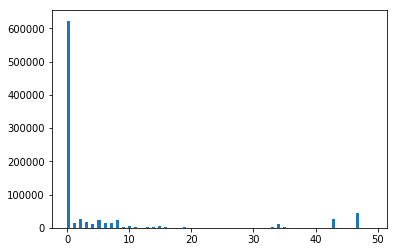

In [32]:
# How much data is missing in each row of the dataset?
NaN_row_totals = azdias_demographics.isna().sum(axis = 1)
plt.hist(NaN_row_totals, bins = 100)
plt.show()

# https://knowledge.udacity.com/questions/936070

In [33]:
# Write code to divide the data into two subsets based on the number of missing values in each row.
# Threshold = 25
NaNs_below_thr = azdias_demographics[azdias_demographics.isna().sum(axis=1) <= 25]
NaNs_above_thr = azdias_demographics[azdias_demographics.isna().sum(axis=1) > 26]

# https://knowledge.udacity.com/questions/236887

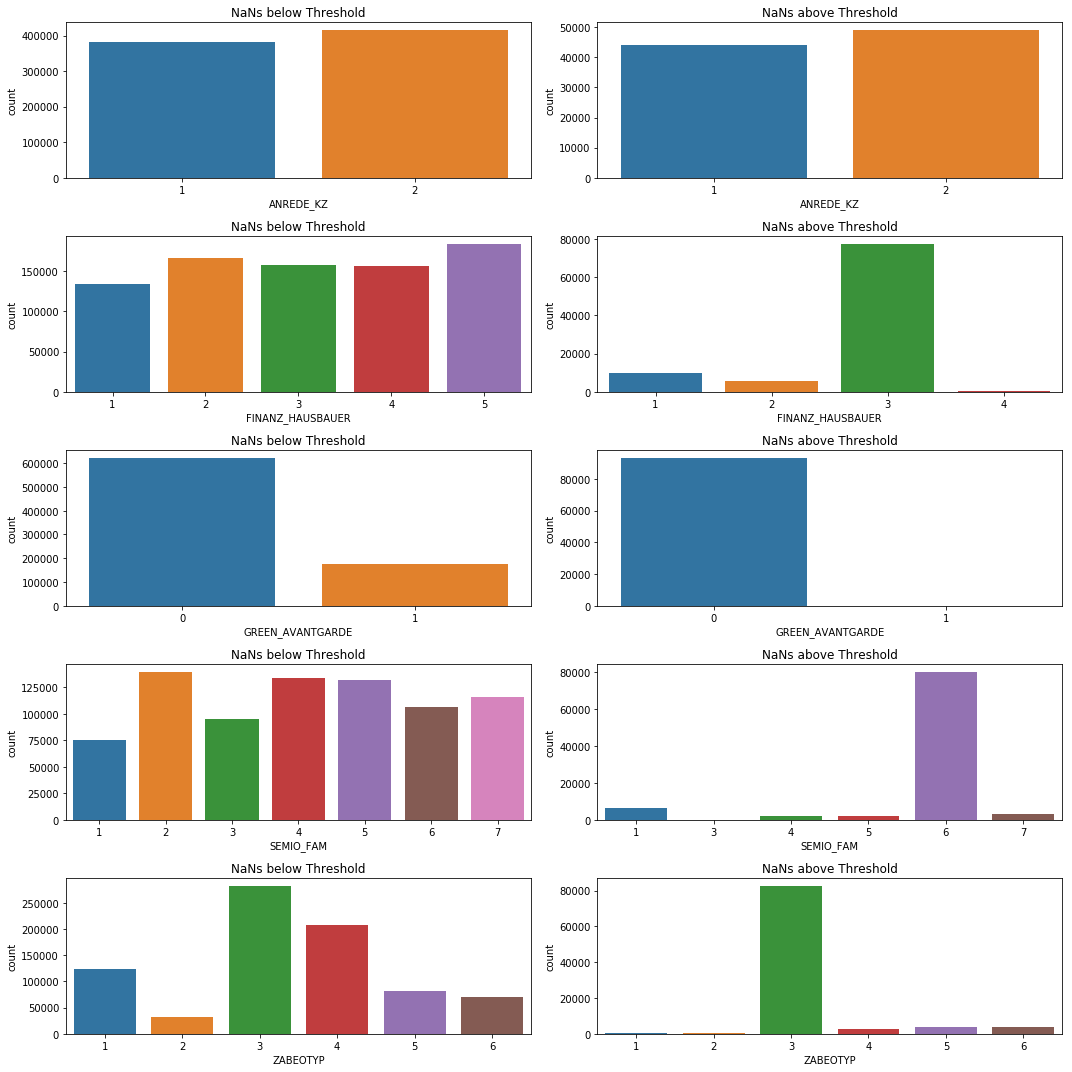

In [34]:
# Compare the distribution of values for at least 5 columns where there are no or few missing values, between the two subsets.
columns = ["ANREDE_KZ", "FINANZ_HAUSBAUER", "GREEN_AVANTGARDE", "SEMIO_FAM", "ZABEOTYP"]

fig, axs = plt.subplots(5,2, figsize=(15,15))

n = 0
for column in columns:
    sns.countplot(NaNs_below_thr[column], ax=axs[n,0])
    axs[n,0].set_title('NaNs below Threshold')
    sns.countplot(NaNs_above_thr[column], ax=axs[n,1])
    axs[n,1].set_title('NaNs above Threshold')
    n += 1
plt.tight_layout()

# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
# https://knowledge.udacity.com/questions/786526
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

#### Discussion 1.1.3: Assess Missing Data in Each Row

Of the five columns plotted above, the ANREDE_KZ and GREEN_AVANTGARDE charts display similar distribution of values when compared against both subsets, so this data could be removed without significantly affecting the analysis. Charts for the other three columns (FINANZ_HAUSBAUER, SEMIO_FAM, AND ZABEOTYP) show the qualitative differences between the subsets. The <= 25 threshold charts in the left column have significantly larger amounts of data when compared with the > 25 threshold charts in the right column. This means that removal of this data could affect analysis of each subset in a different way. Interestingly, four out of five right-column charts have one data value appearing in greater numbers than the rest; it is currently unknown
whether that is a coincidence.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [35]:
# How many features are there of each data type?
cleaned_azdias_feature_sum['type'].value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [36]:
# Assess categorical variables: which are binary, which are multi-level, and which one needs to be re-encoded

In [37]:
# List categorical features
categorical_features = azdias_feature_sum[azdias_feature_sum["type"] == "categorical"]
print(categorical_features)

# https://knowledge.udacity.com/questions/327597

           attribute information_level         type missing_or_unknown
0           AGER_TYP            person  categorical             [-1,0]
2          ANREDE_KZ            person  categorical             [-1,0]
3      CJT_GESAMTTYP            person  categorical                [0]
10         FINANZTYP            person  categorical               [-1]
12   GFK_URLAUBERTYP            person  categorical                 []
13  GREEN_AVANTGARDE            person  categorical                 []
17   LP_FAMILIE_FEIN            person  categorical                [0]
18   LP_FAMILIE_GROB            person  categorical                [0]
19    LP_STATUS_FEIN            person  categorical                [0]
20    LP_STATUS_GROB            person  categorical                [0]
21  NATIONALITAET_KZ            person  categorical             [-1,0]
38       SHOPPER_TYP            person  categorical               [-1]
39           SOHO_KZ            person  categorical               [-1]
40    

In [38]:
# Assess categorical variables which are binary, which are multi-level, and which one needs to be re-encoded?
binary = []
multi = []
      
for col in categorical_features['attribute']:
    if col in azdias_demographics.columns:
        if len(azdias_demographics[col].dropna().unique()) == 2:
            binary.append(col)
        elif len(azdias_demographics[col].dropna().unique()) > 2:
            multi.append(col)
    else: print(f"Skipping previously dropped column: {col}")

print('Binary variables:', binary)
print()
print('Multi variables:', multi)

# https://knowledge.udacity.com/questions/904662

Skipping previously dropped column: AGER_TYP
Skipping previously dropped column: TITEL_KZ
Skipping previously dropped column: KK_KUNDENTYP
Binary variables: ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

Multi variables: ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [39]:
# Drop the multi-level categorical variables
azdias_demographics.drop(columns = ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB',
    'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 
    'CAMEO_DEU_2015'], inplace = True)

In [40]:
# Drop the variable picked up by the binary code but had values (1,2) instead of (0,1)
azdias_demographics.drop(columns = ['VERS_TYP'], inplace = True)

In [41]:
# Verify that the columns were dropped
azdias_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 65 columns):
ALTERSKATEGORIE_GROB     888340 non-null float64
ANREDE_KZ                891221 non-null int64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               780025 non-null float64
LP_LEBENSPHASE_FEIN      793589 non-null float64
LP_LEBENSPHASE_GROB      796649 non-null float64
PRAEGENDE_JUGENDJAHRE    783057 non-null float64
RETOURTYP_BK_S           886367 non-null float64
SEMIO_SOZ                891221 non-null int64
SEMIO_FAM                891221 non-null int64
SEMIO_REL                891221 non-null int64
SEMIO_MAT                891221 non-null int64
SEMIO_VERT               891221

In [42]:
# Re-encode categorical variable(s) to be kept in the analysis
azdias_demographics["OST_WEST_KZ"] = azdias_demographics["OST_WEST_KZ"].replace({"O": "0", "W": "1"})

In [43]:
# Convert OST_WEST_KZ datatype from object to float
azdias_demographics["OST_WEST_KZ"] = azdias_demographics["OST_WEST_KZ"].astype(float)

In [44]:
# Print subset to verify that the W & O values in OST_WEST_KZ were converted
azdias_demographics['OST_WEST_KZ'].head(10)

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: OST_WEST_KZ, dtype: float64

#### Discussion 1.2.1: Re-Encode Categorical Features

21 features were categorical. ANREDE_KZ, GREEN_AVANTGARDE, and SOHO_KZ were binary. VERS_TYP was picked up as a binary variable but its values were (1,2) instead of (0,1). OST_WEST_KZ values were W and O instead of 0 and 1. The remaining variables were multi-categorical.

ANREDE_KZ, GREEN_AVANTGARDE, and SOHO_KZ were kept. The values in OST_WEST_KZ manually converted to 0s and 1s and the column datatype was converted from object to float64. The multi-categorical variables were dropped, as was VERS_TYP.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [45]:
# List mixed variables
mixed_features = cleaned_azdias_feature_sum[cleaned_azdias_feature_sum["type"] == "mixed"]
print(mixed_features)

                      information_level   type missing_or_unknown NaN_values
attribute                                                                   
LP_LEBENSPHASE_FEIN              person  mixed                [0]        [0]
LP_LEBENSPHASE_GROB              person  mixed                [0]        [0]
PRAEGENDE_JUGENDJAHRE            person  mixed             [-1,0]    [-1, 0]
WOHNLAGE                       building  mixed               [-1]       [-1]
CAMEO_INTL_2015           microcell_rr4  mixed            [-1,XX]   [-1, XX]
KBA05_BAUMAX              microcell_rr3  mixed             [-1,0]    [-1, 0]
PLZ8_BAUMAX              macrocell_plz8  mixed             [-1,0]    [-1, 0]


In [46]:
# Investigate "PRAEGENDE_JUGENDJAHRE"
azdias_demographics['PRAEGENDE_JUGENDJAHRE'].head(10)

# https://knowledge.udacity.com/questions/115912
# https://knowledge.udacity.com/questions/373358

0     NaN
1    14.0
2    15.0
3     8.0
4     8.0
5     3.0
6    10.0
7     8.0
8    11.0
9    15.0
Name: PRAEGENDE_JUGENDJAHRE, dtype: float64

In [47]:
# Create dictionary for decade
decade = {1:40, 2:40, 3:50, 4:50, 5:60, 6:60, 7:60, 8:70, 9:70, 10:80, 11:80, 12:80, 13:80, 14:90, 15:90}

In [48]:
# Create dictionary for movement
# Mainstream = 0, Avantgarde = 1
movement = {1:0, 2:1, 3:0, 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 11:1, 12:0, 13:1, 14:0, 15:1}

In [49]:
# Engineer two new variables in df and populate with dictionary data
azdias_demographics['P_J_DECADE'] = azdias_demographics['PRAEGENDE_JUGENDJAHRE'].map(decade)
azdias_demographics['P_J_MOVEMENT'] = azdias_demographics['PRAEGENDE_JUGENDJAHRE'].map(movement)

# https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/#by-using-dictionary

In [50]:
# Verify creation of new columns
azdias_demographics.loc[1:10, ['PRAEGENDE_JUGENDJAHRE', 'P_J_DECADE', 'P_J_MOVEMENT']]

,PRAEGENDE_JUGENDJAHRE,P_J_DECADE,P_J_MOVEMENT
1,14.0,90.0,0.0
2,15.0,90.0,1.0
3,8.0,70.0,0.0
4,8.0,70.0,0.0
5,3.0,50.0,0.0
6,10.0,80.0,0.0
7,8.0,70.0,0.0
8,11.0,80.0,1.0
9,15.0,90.0,1.0
10,3.0,50.0,0.0


In [51]:
# Delete original PRAEGENDE_JUGENDJAHRE column
azdias_demographics.drop(columns = ['PRAEGENDE_JUGENDJAHRE'], inplace = True)

In [52]:
# Verify column is removed
azdias_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 66 columns):
ALTERSKATEGORIE_GROB     888340 non-null float64
ANREDE_KZ                891221 non-null int64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               780025 non-null float64
LP_LEBENSPHASE_FEIN      793589 non-null float64
LP_LEBENSPHASE_GROB      796649 non-null float64
RETOURTYP_BK_S           886367 non-null float64
SEMIO_SOZ                891221 non-null int64
SEMIO_FAM                891221 non-null int64
SEMIO_REL                891221 non-null int64
SEMIO_MAT                891221 non-null int64
SEMIO_VERT               891221 non-null int64
SEMIO_LUST               891221 n

In [53]:
# Investigate "CAMEO_INTL_2015"
azdias_demographics['CAMEO_INTL_2015'].head()

0    NaN
1     51
2     24
3     12
4     43
Name: CAMEO_INTL_2015, dtype: object

In [54]:
# Create dictionary for wealth
wealth = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2, '31':3, '32':3, '33':3, '34':3, 
          '35':3, '41':4, '42':4, '43':4, '44':4, '45':4, '51':5, '52':5, '53':5, '54':5, '55':5}

In [55]:
# Create dictionary for life stage
life_stage = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5, '31':1, '32':2, '33':3, '34':4, 
              '35':5, '41':1, '42':2, '43':3, '44':4, '45':5, '51':1, '52':2, '53':3, '54':4, '55':5}

In [56]:
# Engineer two new variables in df and populate with dictionary data
azdias_demographics['CAMEO_INTL_2015_WEALTH'] = azdias_demographics['CAMEO_INTL_2015'].map(wealth)
azdias_demographics['CAMEO_INTL_2015_LIFE_STAGE'] = azdias_demographics['CAMEO_INTL_2015'].map(life_stage)

In [57]:
# Verify creation of new columns
azdias_demographics.loc[1:10, ['CAMEO_INTL_2015', 'CAMEO_INTL_2015_WEALTH', 'CAMEO_INTL_2015_LIFE_STAGE']]

,CAMEO_INTL_2015,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
1,51,5.0,1.0
2,24,2.0,4.0
3,12,1.0,2.0
4,43,4.0,3.0
5,54,5.0,4.0
6,22,2.0,2.0
7,14,1.0,4.0
8,13,1.0,3.0
9,15,1.0,5.0
10,51,5.0,1.0


In [58]:
# Delete original CAMEO_INTL_2015 column
azdias_demographics.drop(columns = ['CAMEO_INTL_2015'], inplace = True)

In [59]:
# Verify column is removed
azdias_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 67 columns):
ALTERSKATEGORIE_GROB          888340 non-null float64
ANREDE_KZ                     891221 non-null int64
FINANZ_MINIMALIST             891221 non-null int64
FINANZ_SPARER                 891221 non-null int64
FINANZ_VORSORGER              891221 non-null int64
FINANZ_ANLEGER                891221 non-null int64
FINANZ_UNAUFFAELLIGER         891221 non-null int64
FINANZ_HAUSBAUER              891221 non-null int64
GREEN_AVANTGARDE              891221 non-null int64
HEALTH_TYP                    780025 non-null float64
LP_LEBENSPHASE_FEIN           793589 non-null float64
LP_LEBENSPHASE_GROB           796649 non-null float64
RETOURTYP_BK_S                886367 non-null float64
SEMIO_SOZ                     891221 non-null int64
SEMIO_FAM                     891221 non-null int64
SEMIO_REL                     891221 non-null int64
SEMIO_MAT                     891221 non-null i

In [60]:
# Drop mixed variable columns that won't be converted
azdias_demographics.drop(columns = ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB'], inplace = True)

#Print df to verify columns were dropped
azdias_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 65 columns):
ALTERSKATEGORIE_GROB          888340 non-null float64
ANREDE_KZ                     891221 non-null int64
FINANZ_MINIMALIST             891221 non-null int64
FINANZ_SPARER                 891221 non-null int64
FINANZ_VORSORGER              891221 non-null int64
FINANZ_ANLEGER                891221 non-null int64
FINANZ_UNAUFFAELLIGER         891221 non-null int64
FINANZ_HAUSBAUER              891221 non-null int64
GREEN_AVANTGARDE              891221 non-null int64
HEALTH_TYP                    780025 non-null float64
RETOURTYP_BK_S                886367 non-null float64
SEMIO_SOZ                     891221 non-null int64
SEMIO_FAM                     891221 non-null int64
SEMIO_REL                     891221 non-null int64
SEMIO_MAT                     891221 non-null int64
SEMIO_VERT                    891221 non-null int64
SEMIO_LUST                    891221 non-null int64

In [61]:
# Create a dictionary pairing column names with sequential numbers
column_dictionary = {column_name: i for i, column_name in enumerate(azdias_demographics.columns)} 
print(column_dictionary)
    
# https://stackoverflow.com/questions/58895019/how-to-create-dictionary-from-column-names-as-values-and-variables-as-keys-x1-x

{'ALTERSKATEGORIE_GROB': 0, 'ANREDE_KZ': 1, 'FINANZ_MINIMALIST': 2, 'FINANZ_SPARER': 3, 'FINANZ_VORSORGER': 4, 'FINANZ_ANLEGER': 5, 'FINANZ_UNAUFFAELLIGER': 6, 'FINANZ_HAUSBAUER': 7, 'GREEN_AVANTGARDE': 8, 'HEALTH_TYP': 9, 'RETOURTYP_BK_S': 10, 'SEMIO_SOZ': 11, 'SEMIO_FAM': 12, 'SEMIO_REL': 13, 'SEMIO_MAT': 14, 'SEMIO_VERT': 15, 'SEMIO_LUST': 16, 'SEMIO_ERL': 17, 'SEMIO_KULT': 18, 'SEMIO_RAT': 19, 'SEMIO_KRIT': 20, 'SEMIO_DOM': 21, 'SEMIO_KAEM': 22, 'SEMIO_PFLICHT': 23, 'SEMIO_TRADV': 24, 'SOHO_KZ': 25, 'ANZ_PERSONEN': 26, 'ANZ_TITEL': 27, 'HH_EINKOMMEN_SCORE': 28, 'W_KEIT_KIND_HH': 29, 'WOHNDAUER_2008': 30, 'ANZ_HAUSHALTE_AKTIV': 31, 'ANZ_HH_TITEL': 32, 'KONSUMNAEHE': 33, 'MIN_GEBAEUDEJAHR': 34, 'OST_WEST_KZ': 35, 'WOHNLAGE': 36, 'KBA05_ANTG1': 37, 'KBA05_ANTG2': 38, 'KBA05_ANTG3': 39, 'KBA05_ANTG4': 40, 'KBA05_GBZ': 41, 'BALLRAUM': 42, 'EWDICHTE': 43, 'INNENSTADT': 44, 'GEBAEUDETYP_RASTER': 45, 'KKK': 46, 'MOBI_REGIO': 47, 'ONLINE_AFFINITAET': 48, 'REGIOTYP': 49, 'KBA13_ANZAHL_PKW': 

#### Discussion 1.2.2: Engineer Mixed-Type Features

LP_LEBENSPHASE_FEIN and LP_LEBENSPHASE_GROB were dropped because the descriptions accompanying each code contained inconsistant amounts and types of information which were not easily sliceable into dictionary key-values.

PRAEGENDE_JUGENDJAHRE was dropped and replaced with P_J_DECADE and P_J_MOVEMENT. CAMEO_INTL_2015 was dropped and replaced with CAMEO_INTL_2015_WEALTH and CAMEO_INTL_2015_LIFE_STAGE. In both cases, dictionaries were created to sort the data into appropriate columns.

WOHNLAGE, KBA05_BAUMAX, and PLZ8_BAUMAX were kept without change since each code corresponds to a distinct description and the descriptions did not overlap with each other.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [62]:
# Check data within dataframe
azdias_demographics.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,P_J_DECADE,P_J_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,2.0,1,3,4,3,5,5,3,0,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,1,5,2,5,4,5,0,3.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1.0,4.0,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,90.0,0.0,5.0,1.0
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1.0,2.0,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,90.0,1.0,2.0,4.0
3,4.0,2,4,2,5,2,1,2,0,2.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,4.0,1997.0,1.0,7.0,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,70.0,0.0,1.0,2.0
4,3.0,1,4,3,4,1,3,2,0,3.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1.0,3.0,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,70.0,0.0,4.0,3.0


In [63]:
# Check columns present and their data types
azdias_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 65 columns):
ALTERSKATEGORIE_GROB          888340 non-null float64
ANREDE_KZ                     891221 non-null int64
FINANZ_MINIMALIST             891221 non-null int64
FINANZ_SPARER                 891221 non-null int64
FINANZ_VORSORGER              891221 non-null int64
FINANZ_ANLEGER                891221 non-null int64
FINANZ_UNAUFFAELLIGER         891221 non-null int64
FINANZ_HAUSBAUER              891221 non-null int64
GREEN_AVANTGARDE              891221 non-null int64
HEALTH_TYP                    780025 non-null float64
RETOURTYP_BK_S                886367 non-null float64
SEMIO_SOZ                     891221 non-null int64
SEMIO_FAM                     891221 non-null int64
SEMIO_REL                     891221 non-null int64
SEMIO_MAT                     891221 non-null int64
SEMIO_VERT                    891221 non-null int64
SEMIO_LUST                    891221 non-null int64

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [64]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """

    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for column in df.columns:
        df[column].replace(cleaned_azdias_feature_sum.loc[column].loc['NaN_values'],np.NaN ,inplace = True)

    # remove selected columns and rows, ...
    # Drop all columns where NaN total is > 300,000
    df.drop(columns = ['AGER_TYP', 'TITEL_KZ', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH'],
    inplace = True)   
    
    # Drop the multi-level categorical variables
    df.drop(columns = ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB',
    'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 
    'CAMEO_DEU_2015'], inplace = True)
    
    # Drop the variable picked up by the binary code but had values (1,2) instead of (0,1)
    df.drop(columns = ['VERS_TYP'], inplace = True)
    
    # select, re-encode, and engineer column values.
    # Re-encode categorical variable(s) to be kept in the analysis
    df["OST_WEST_KZ"] = df["OST_WEST_KZ"].replace({"O": "0", "W": "1"})
    
    # Convert OST_WEST_KZ datatype from object to float
    df["OST_WEST_KZ"] = df["OST_WEST_KZ"].astype(float)

    # Investigate "PRAEGENDE_JUGENDJAHRE"
    # Create dictionary for decade
    decade = {1:40, 2:40, 3:50, 4:50, 5:60, 6:60, 7:60, 8:70, 9:70, 10:80, 11:80, 12:80, 13:80, 14:90, 15:90}
    
    # Create dictionary for movement
    movement = {1:0, 2:1, 3:0, 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 11:1, 12:0, 13:1, 14:0, 15:1}

    # Engineer two new variables in df and populate with dictionary data
    df['P_J_DECADE'] = df['PRAEGENDE_JUGENDJAHRE'].map(decade)
    df['P_J_MOVEMENT'] = df['PRAEGENDE_JUGENDJAHRE'].map(movement)
     
    # Delete original PRAEGENDE_JUGENDJAHRE column
    df.drop(columns = ['PRAEGENDE_JUGENDJAHRE'], inplace = True)    

    # Investigate "CAMEO_INTL_2015"
    # Create dictionary for wealth
    wealth = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2, '31':3, '32':3, '33':3, '34':3, 
              '35':3, '41':4, '42':4, '43':4, '44':4, '45':4, '51':5, '52':5, '53':5, '54':5, '55':5}
    
    # Create dictionary for life stage
    life_stage = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5, '31':1, '32':2, '33':3, '34':4, 
                  '35':5, '41':1, '42':2, '43':3, '44':4, '45':5, '51':1, '52':2, '53':3, '54':4, '55':5}

    # Engineer two new variables in df and populate with dictionary data
    df['CAMEO_INTL_2015_WEALTH'] = df['CAMEO_INTL_2015'].map(wealth)
    df['CAMEO_INTL_2015_LIFE_STAGE'] = df['CAMEO_INTL_2015'].map(life_stage) 
    
    # Delete original CAMEO_INTL_2015 column
    df.drop(columns = ['CAMEO_INTL_2015'], inplace = True)   

    # Drop mixed variable columns that won't be converted
    df.drop(columns = ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB'], inplace = True)

    # Return the cleaned dataframe.
    #return df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [65]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and do that now.

In [66]:
# Find NaN totals in demographic df
total_nan = azdias_demographics.isna().sum()
print(total_nan)

# https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

ALTERSKATEGORIE_GROB            2881
ANREDE_KZ                          0
FINANZ_MINIMALIST                  0
FINANZ_SPARER                      0
FINANZ_VORSORGER                   0
FINANZ_ANLEGER                     0
FINANZ_UNAUFFAELLIGER              0
FINANZ_HAUSBAUER                   0
GREEN_AVANTGARDE                   0
HEALTH_TYP                    111196
RETOURTYP_BK_S                  4854
SEMIO_SOZ                          0
SEMIO_FAM                          0
SEMIO_REL                          0
SEMIO_MAT                          0
SEMIO_VERT                         0
SEMIO_LUST                         0
SEMIO_ERL                          0
SEMIO_KULT                         0
SEMIO_RAT                          0
SEMIO_KRIT                         0
SEMIO_DOM                          0
SEMIO_KAEM                         0
SEMIO_PFLICHT                      0
SEMIO_TRADV                        0
SOHO_KZ                        73499
ANZ_PERSONEN                   73499
A

In [67]:
# Use SimpleImputer to replace NaNs
imputer = SimpleImputer(missing_values = np.nan, strategy ='constant', fill_value = 0)
azdias_demographics = pd.DataFrame(imputer.fit_transform(azdias_demographics), columns=azdias_demographics.columns)
azdias_demographics.head()

# https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,P_J_DECADE,P_J_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,2.0,1.0,3.0,4.0,3.0,5.0,5.0,3.0,0.0,0.0,5.0,2.0,6.0,7.0,5.0,1.0,5.0,3.0,3.0,4.0,7.0,6.0,6.0,5.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,1.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,1.0,4.0,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,90.0,0.0,5.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,6.0,3.0,4.0,7.0,7.0,7.0,3.0,3.0,0.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,1.0,2.0,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,90.0,1.0,2.0,4.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0.0,2.0,2.0,5.0,1.0,2.0,1.0,4.0,4.0,7.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,9.0,1.0,0.0,4.0,1997.0,1.0,7.0,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,70.0,0.0,1.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,5.0,6.0,4.0,4.0,2.0,7.0,4.0,4.0,6.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,1.0,3.0,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,70.0,0.0,4.0,3.0


In [68]:
# Verify NaNs have been replaced
total_nan = azdias_demographics.isna().sum()
print(total_nan)

ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
RETOURTYP_BK_S                0
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KULT                    0
SEMIO_RAT                     0
SEMIO_KRIT                    0
SEMIO_DOM                     0
SEMIO_KAEM                    0
SEMIO_PFLICHT                 0
SEMIO_TRADV                   0
SOHO_KZ                       0
ANZ_PERSONEN                  0
ANZ_TITEL                     0
HH_EINKOMMEN_SCORE            0
W_KEIT_KIND_HH                0
WOHNDAUER_2008                0
ANZ_HAUS

In [69]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler() 
azdias_demographics = scaler.fit_transform(azdias_demographics) 

# https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/

### Discussion 2.1: Apply Feature Scaling

NaNs: An analysis was made of the missing data in the demographics dataset. The decision was made not to remove data points with missing values, since some valuable data could be lost. An imputer was used to replace the NaNs. Imputation strategy options included mean, median, most frequent, and constant. The data dictionary codes for all columns with 70,000 or more NaNs was looked at. The results showed that code 0 tended to have the least distruptive effect on the data, since it usually signified unknown or zero number of some unit (people, homes). As a result, the NaNs were replaced with the constant of 0. Feature scaling was done with StandardScaler().

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [70]:
# Apply PCA to the data.
pca = PCA()
azdias_demographics_pca = pca.fit_transform(azdias_demographics)

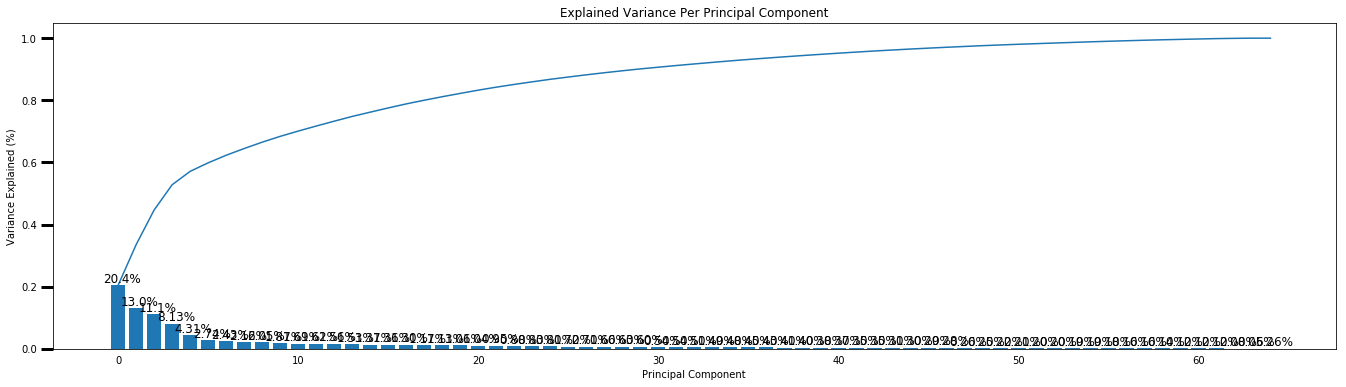

In [71]:
# Define function to plot data into a scree plot
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(23, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=3, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

# https://learn.udacity.com/nanodegrees/nd588-wgu-5/parts/cd0026/lessons/aa1b535b-7955-4110-a69f-1d678626c010/concepts/636168b9-94d4-4832-8fa8-fb380b13ce5a?lesson_tab=lesson
# https://knowledge.udacity.com/questions/575110

In [72]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(18)
azdias_demographics_pca = pca.fit_transform(azdias_demographics)

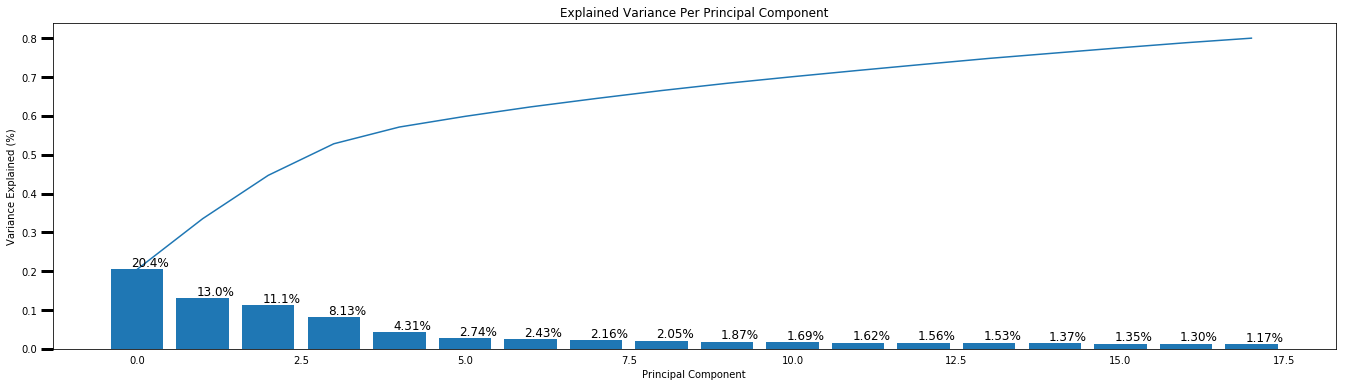

In [73]:
# Plot data into a scree plot
scree_plot(pca)

In [74]:
# Display % of total variance by each principal component
print(pca.explained_variance_ratio_.round(2)[:18])

[0.2  0.13 0.11 0.08 0.04 0.03 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.01 0.01 0.01 0.01]


In [75]:
# delete b4 submission
# Number of rows
num_rows = len(azdias_demographics_pca)

# Number of columns (assuming all rows have the same number of columns)
num_columns = len(azdias_demographics_pca[0]) if num_rows > 0 else 0

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 891221
Number of columns: 18


### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

PCA was applied on the data for dimensionality reduction. The threshold of explained variance was set at 80%, resulting in 18  out of 65 principal components being kept.


https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [76]:
pd_azdias_demographics_pca = pd.DataFrame(azdias_demographics_pca)
pd_azdias_demographics_pca.round(2).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,10.49,-0.66,0.92,1.35,-0.18,-0.98,0.61,0.60,0.29,-0.23,0.15,-0.13,-0.24,0.09,0.25,-0.12,0.44,-0.84
1,-0.20,4.21,-1.22,-3.19,-0.84,2.31,1.71,-1.14,-0.84,-0.90,-0.13,0.49,3.72,10.71,0.83,-0.85,-0.43,1.48
2,-1.14,-0.82,0.74,-3.09,2.12,-0.73,0.42,-1.08,-1.02,0.92,0.92,-2.49,0.48,0.06,0.16,0.65,-0.55,-0.53
3,-0.70,-4.06,0.35,-0.73,-0.45,0.64,0.10,-1.16,0.43,0.07,-0.40,-0.25,-1.68,0.62,-0.81,-0.14,0.42,0.12
4,-3.20,0.50,-0.71,2.70,0.51,-0.93,-2.32,-0.77,-0.78,-0.11,1.74,1.94,0.37,-0.47,-1.50,1.20,-0.02,-0.17


In [77]:
def print_component(pca, component):
    if component < len(pca.components_):  
        weight_df = pd.DataFrame({'weight': pca.components_.T[:, component]}, index=list(column_dictionary.keys()))
        print(weight_df.sort_values(by='weight').head(5))
        print(weight_df.sort_values(by='weight').tail(5))
    else:
        print('Principal component row number outside of range.')

# https://knowledge.udacity.com/questions/117888
# https://knowledge.udacity.com/questions/1057411
# https://bobbyhadz.com/blog/python-get-position-of-key-in-dictionary

In [78]:
# Map weights for the first principal component
print("Component PC1:")
print_component(pca, 0)

Component PC1:
                      weight
MIN_GEBAEUDEJAHR   -0.256233
GEBAEUDETYP_RASTER -0.212550
PLZ8_HHZ           -0.207943
WOHNDAUER_2008     -0.199759
ARBEIT             -0.192617
                         weight
FINANZ_SPARER          0.105821
SEMIO_KRIT             0.109030
SEMIO_REL              0.129594
FINANZ_ANLEGER         0.143171
FINANZ_UNAUFFAELLIGER  0.156033


In [79]:
# Map weights for the second principal component to corresponding feature names & then print the linked values sorted by weight.
print("Component PC2:")
print_component(pca, 1)

Component PC2:
                        weight
FINANZ_MINIMALIST    -0.255570
KBA05_ANTG1          -0.193420
ALTERSKATEGORIE_GROB -0.178660
FINANZ_VORSORGER     -0.168923
MOBI_REGIO           -0.160646
                      weight
FINANZ_SPARER       0.195514
HH_EINKOMMEN_SCORE  0.203855
PLZ8_BAUMAX         0.212936
PLZ8_ANTG3          0.215989
PLZ8_ANTG4          0.223455


In [80]:
# Map weights for the third principal component to corresponding feature names & then print the linked values sorted by weight.
print("Component PC3:")
print_component(pca, 2)

Component PC3:
                 weight
SEMIO_KULT    -0.255315
SEMIO_TRADV   -0.208035
SEMIO_REL     -0.206908
SEMIO_FAM     -0.197397
SEMIO_PFLICHT -0.183456
                        weight
SEMIO_KRIT            0.174023
FINANZ_VORSORGER      0.182685
SEMIO_KAEM            0.189177
ALTERSKATEGORIE_GROB  0.211536
SEMIO_ERL             0.235176


### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

PC1: This principal component is made up of data entailing buildings and characterizations of people. All positive loadings involve defining people by a specific financial or personality typology, with the highest weights being FINANZ_ANLEGER (investor) and FINANZ_UNAUFFAELLIGER (unobtrusive). In contrast, most of the negative feature weights involve housing and other types of buildings. It appears that categorizations of people had a stronger positive correlation to PC1 while data about physical structures had a stronger negative correlation.

PC2: This principal component was made up of a wider variety of data than PC1. The strongest positive loadings are made up of the number of houses in the PLZ8 region, and the other two weights involve household income and people characterized as money-savers. In contrast, the negative weights don’t focus just on one demographic feature but rather a smattering of factors that indirectly involve family finances: FINANZ-MINIMALIST, MOBI_REGIO (movement patterns), and financial categories of MINIMALIST (low financial interest), and VORSORGER (be prepared). Housing density was the single strongest positive correlation for this principal component while no single factor had a large influence on negative correlation.

PC3: The loadings examined in this PC were made up entirely of classifications of people, with the positive loadings involving financial or personality typology. All the negative feature weights involve grouping respondents by personality type. Groupings of critical-minded, combative, and event-oriented people (SEMIO_KRIT, SEMIO_KAEM, and SEMIO_ERL, respectively) had a stronger positive correlation to PC3 while those who were cultural-minded, traditional-minded, religious, family-minded, and dutiful (SEMIO_KULT, SEMIO_TRADV, SEMIO_REL, SEMIO_FAM, SEMIO_PFLICHT) had a stronger negative correlation.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [81]:
# Over a number of different cluster counts...
# run k-means clustering on the data
# compute the average within-cluster distances.

# Define function to compute Kmeans score
def get_kmeans_score(azdias_demographics_pca, center):
    kmeans = KMeans(n_clusters = center, random_state = 0)
    model = kmeans.fit(azdias_demographics_pca)
    score = np.abs(model.score(azdias_demographics_pca))
    
    return score

# https://scikit-learn.org/stable/glossary.html#term-random_state

In [82]:
# Use function to calculate Kmeans score
# Note: Code takes about 25 minutes to run

scores = []
centers = list(range(1,18,3))

for center in centers:
    scores.append(get_kmeans_score(azdias_demographics_pca, center))

# https://knowledge.udacity.com/questions/672114    
# https://knowledge.udacity.com/questions/377434
# https://learn.udacity.com/nanodegrees/nd588-wgu-5/parts/cd0026/lessons/a767ff65-a841-42f6-b3ae-6708110969ef/concepts/200bb2c9-bb72-4486-9c59-8de9ddd1670c?lesson_tab=lesson
# https://knowledge.udacity.com/questions/1020407
# https://knowledge.udacity.com/questions/5944

Text(0.5,1,'Demo Scree Plot')

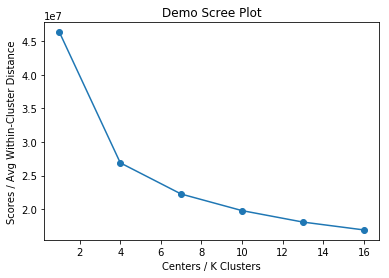

In [83]:
# Plot centers vs. scores to find elbow value
plt.plot(centers, scores, marker='o')
plt.xlabel('Centers / K Clusters')
plt.ylabel('Scores / Avg Within-Cluster Distance')
plt.title('Demo Scree Plot')

In [84]:
# Refit kmeans model with the selected number of clusters; get cluster predictions for the general population demographics data.
# Note: Code takes about 3 minutes

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(azdias_demographics_pca)
demo_cluster_predictions = kmeans.predict(azdias_demographics_pca)
print(demo_cluster_predictions)

# https://www.statology.org/k-means-clustering-in-python/
# https://stackoverflow.com/questions/1987694/how-do-i-print-the-full-numpy-array-without-truncation

[3 1 2 ... 1 1 2]


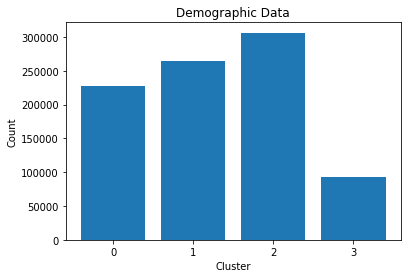

In [85]:
# Create a DataFrame with the cluster predictions 
cluster_demo = pd.DataFrame({'Cluster': demo_cluster_predictions})

# Count the number of instances in each cluster 
demo_cluster_counts = cluster_demo['Cluster'].value_counts().sort_index() 

# Plot bar chart 
plt.bar(demo_cluster_counts.index, demo_cluster_counts.values) 
plt.xlabel('Cluster') 
plt.ylabel('Count') 
plt.title('Demographic Data')
plt.xticks(demo_cluster_counts.index) 
plt.show()

# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)
I will segment the population into four clusters since that is where the elbow appears in the scree chart above. Each cluster is graphed independently to keep the kernel from crashing. The yellow dots are the plotted centroids.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [86]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', delimiter = ";")

In [87]:
# Apply preprocessing, feature transformation, and clustering from the general demographics onto the customer data, obtaining 
# cluster predictions for the customer demographics data.

In [88]:
# Apply preprocessing to customer data
clean_data(customers)

In [ ]:
# Verify customer data is processed
customers.head()

In [96]:
customers.shape

(191652, 65)

In [97]:
# Apply feature transformation

In [98]:
# Use Imputer to replace NaNs
customers_imputer = imputer.transform(customers)

# https://knowledge.udacity.com/questions/1019700

In [99]:
# Apply feature scaling
customers_scaled = scaler.transform(customers_imputer)

# https://knowledge.udacity.com/questions/1019700

In [100]:
# Apply PCA
customers_pca = pca.transform(customers_scaled)

# https://knowledge.udacity.com/questions/1019700

In [101]:
# Use function to calculate Kmeans score 
# Note: Code takes about 25 minutes to run

scores = []
centers = list(range(1,18,3))

for center in centers:
    scores.append(get_kmeans_score(customers_pca, center))

Text(0.5,1,'Customer Scree Plot')

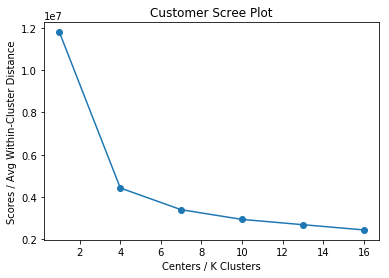

In [110]:
# Plot centers vs. scores to find elbow value
plt.plot(centers, scores, marker='o')
plt.xlabel('Centers / K Clusters')
plt.ylabel('Scores / Avg Within-Cluster Distance')
plt.title('Customer Scree Plot')

In [103]:
# Refit kmeans model with the selected number of clusters; get cluster predictions for the general population demographics data.
# Note: Code takes about 3 minutes

cust_cluster_predictions = kmeans.predict(customers_pca)
print(cust_cluster_predictions)

[1 2 0 ... 1 0 1]


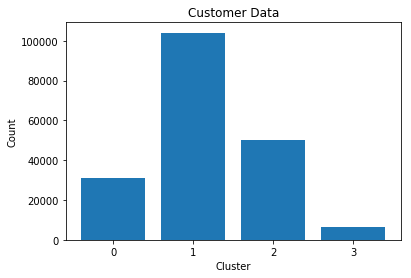

In [131]:
# Create a DataFrame with the cluster predictions 
cluster_cust = pd.DataFrame({'Cluster': cust_cluster_predictions})

# Count the number of instances in each cluster 
cust_cluster_counts = cluster_cust['Cluster'].value_counts().sort_index() 

# Plot bar chart 
plt.bar(cust_cluster_counts.index, cust_cluster_counts.values) 
plt.xlabel('Cluster') 
plt.ylabel('Count') 
plt.title('Customer Data')
plt.xticks(cust_cluster_counts.index) 
plt.show()

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations! Optional per Rajat: https://knowledge.udacity.com/questions/976795
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

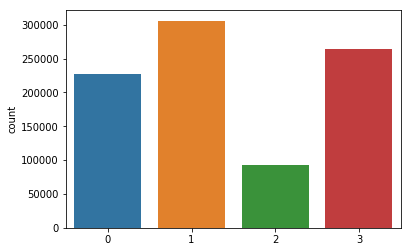

In [114]:
# Compare the proportion of data in each cluster for the customer and general population (demo)

demo_cluster_counts = kmeans.predict(azdias_demographics_pca)
sns.countplot(demo_cluster_counts, label='Demo')

# https://knowledge.udacity.com/questions/802684

# https://knowledge.udacity.com/questions/906309
# https://knowledge.udacity.com/questions/1032160

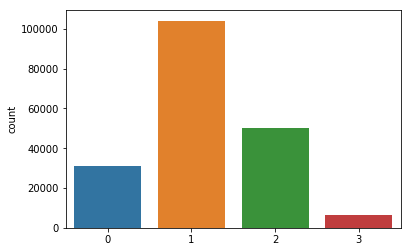

In [115]:
cust_cluster_counts = kmeans.predict(customers_pca)
sns.countplot(cust_cluster_counts, label='Customer')

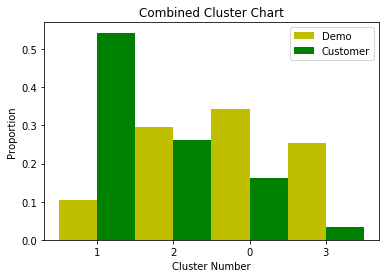

In [129]:
# Compare the proportion of data in each cluster for the customer and general population (demo)
# Change y-axis to proportion for clusters and plot both dataframes on one graph

from collections import Counter

labels, values = zip(*Counter(cust_cluster_counts).items())
v = list(values)
v[:] = [x/len(cust_cluster_counts) for x in v]
indexes = np.arange(len(labels))

labels1, values1 = zip(*Counter(demo_cluster_counts).items())
v1 = list(values1)
v1[:] = [x/len(demo_cluster_counts) for x in v1]
indexes1 = np.arange(len(labels))

width = .5
plt.bar(indexes1, v1, width, color='y', label='Demo')
plt.bar(indexes + width, v, width, color='g', label='Customer')
plt.xticks(indexes + width * 0.5, labels)
plt.legend(loc='upper right')
plt.title('Combined Clusters') 
plt.ylabel('Proportion') 
plt.xlabel('Cluster Number')
plt.show()

# https://knowledge.udacity.com/questions/905904

In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the customer data compared to the general population?



#inverse transform:
# https://knowledge.udacity.com/questions/696191
# https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/ 
# - get original features back
# https://knowledge.udacity.com/questions/906309

In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the customer data compared to the general population?



### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.